#### KMEANS CLUSTERING

## Objectives
- perform k-means clustering in scikit-learn
- Describe the tuning parameters in sklearn implementation of kmeans clustering
- Use elbow plot with various metrics to determine the optimal number of clusters

## The K-means Algorithm
1. Select k initial seeds
2. Assign each observation to the cluster to which it is the closest
3. Recompute the cluster centroid
4. Reassign the observation to one of the clusters according to the same rule
5. Stop if there is no reallocation

Create a dataset

In [15]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

#### Create a synthetic dataset using make_blobs()

In [16]:
X,y = make_blobs(n_samples=400, n_features=2, centers=6, cluster_std=0.8)

#### Visualize clusters

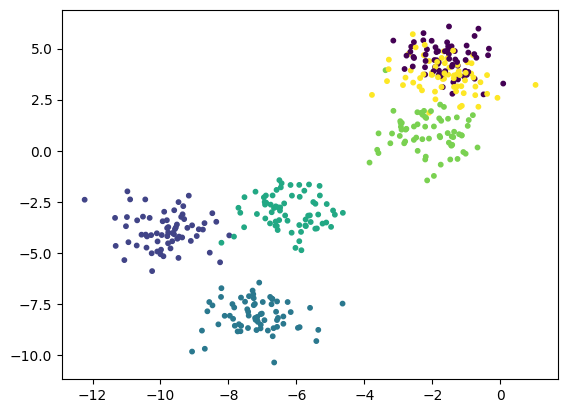

In [17]:
plt.scatter(X[:,0], X[:,1], c=y , s=10)

Using KMeans to fit the data

In [18]:
kmeans = KMeans(n_clusters=6) # Instantiate kmeans class, set n_clusters=6
kmeans.fit(X) # Fit the kmeans to the data stored in X
predicted_clusters = kmeans.predict(X) # PREDICT WHICH DATA POINT BELONGS TO WHICH CLUSTERS

Create visualization of the predictions

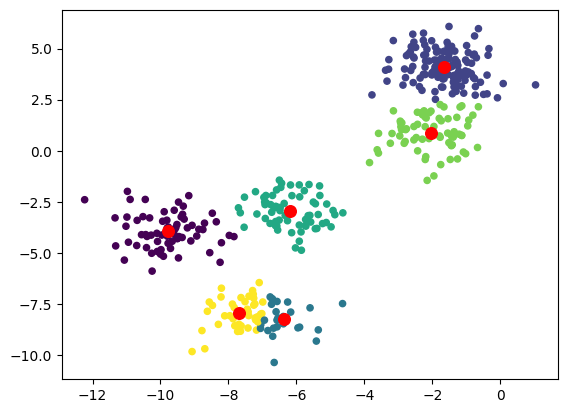

In [19]:
plt.scatter(X[:,0], X[:,1], c= predicted_clusters, s=20)
centers = kmeans.cluster_centers_ # Get the centers of the clusters

# create another scatter plot and pass in centers [:,0] and [:,1] set c='red' and size = 70
plt.scatter(centers[:,0], centers[:,1], c='red', s=70)

## TUNING PARAMETERS

1. The init parameter - specify method of initialization
2. The algorithm parameter - specify the algorithm used

#### Dealing with an unknown number of clusters
- create another dataset use make_blobs, pass in the following parameters;
    - n_samples = 400
    - n_features = 2
    - centers = np.random.randint(3,8)
    - cluster_std = 0.8


In [20]:
X_2, y_2 = make_blobs(n_samples=400, n_features=2, centers=np.random.randint(3,8))

- Instantiate and fit KMeans with a different value for n_clusters between 3 and 8

- store in different lists

In [21]:
k_means_3 = KMeans(n_clusters=3).fit(X_2) 
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)
k_means_8 = KMeans(n_clusters=8).fit(X_2)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7, k_means_8]

import calinski_harabasz_score from sklearn

In [22]:
from sklearn.metrics import calinski_harabasz_score

- create an empty list CH_score = []
- loop through the models you stored in k_list
    - get the labels for each of the models
    - Calculate the CH score, pass data for X_2 and the labels
    - Append this score CH_score

In [23]:
CH_score = []
for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(X_2, labels))

### Visualize elbow plot in CH score

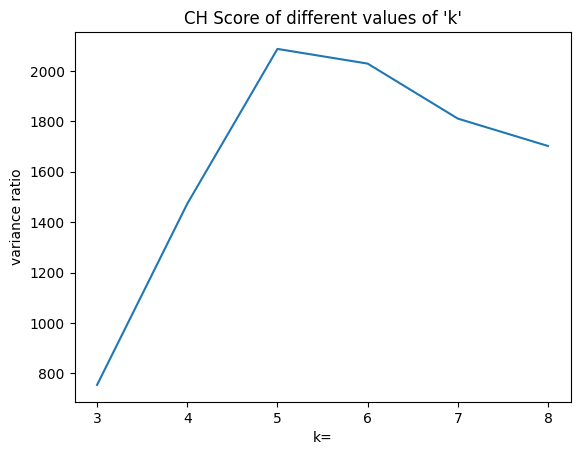

In [24]:
plt.plot([3, 4, 5, 6, 7, 8], CH_score)
plt.xticks([3, 4, 5, 6, 7, 8])
plt.title("CH Score of different values of 'k'")
plt.xlabel('k=')
plt.ylabel("variance ratio")
plt.show()

USE Within cluster Sum of Squares (WCSS)

In [25]:
WCSS = []
for model in k_list:
    WCSS.append(model.inertia_)


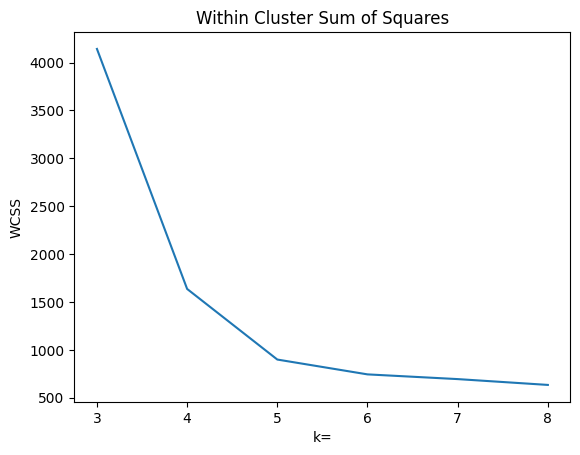

In [26]:
plt.plot([3, 4, 5, 6, 7, 8], WCSS)
plt.xticks([3, 4, 5, 6, 7, 8])
plt.title("Within Cluster Sum of Squares")
plt.xlabel('k=')
plt.ylabel("WCSS")
plt.show()

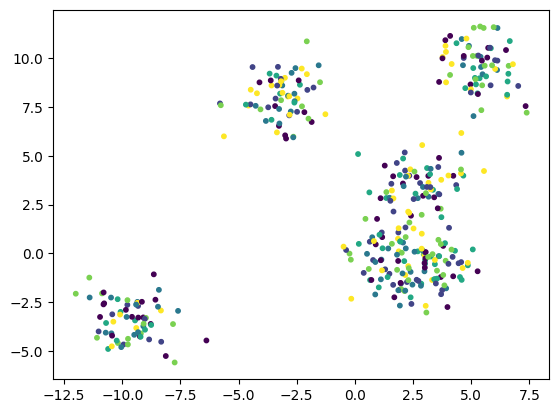

In [27]:
plt.scatter(X_2[:,0], X_2[:,1], c=y, s=10);